In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import detrend, resample

### Define Model

In [7]:
# Define the delayed first-order system
def delayed_first_order_system(t, K, T):
    response = np.zeros_like(t)
    delayed_t = t - T
    valid_idx = delayed_t >= 0
    response[valid_idx] = K * delayed_t[valid_idx]
    return response

### Load the Data

In [8]:
# Load and preprocess the data
experiments = [
    'Data/samsun low light window 7cm/7cm/trial01_DR_sos_eigenmania_fish01_IL_WY_LS_CL_Fri_Sep_16_10_04_22_2022_TRACK.xlsx',
    'Data/samsun low light window 7cm/7cm/trial02_DR_sos_eigenmania_fish01_IL_WY_LS_CL_Fri_Sep_16_10_08_20_2022_TRACK.xlsx',
    'Data/samsun low light window 7cm/7cm/trial03_DR_sos_eigenmania_fish01_IL_WY_LS_CL_Fri_Sep_16_10_10_11_2022_TRACK.xlsx',
    'Data/samsun low light window 7cm/7cm/trial04_DR_sos_eigenmania_fish01_IL_WY_LS_CL_Fri_Sep_16_10_11_50_2022_TRACK.xlsx',
    'Data/samsun low light window 7cm/7cm/trial05_DR_sos_eigenmania_fish01_IL_WY_LS_CL_Fri_Sep_16_10_13_41_2022_TRACK.xlsx',
]

trials = []
cage = None

# Load the data and resample each trial to match the length of the first trial
for experiment in experiments:
    table = pd.read_excel(experiment)
    fish_data = detrend(table['Fish'])
    if cage is None:
        cage = detrend(table['Cage'])
        t = np.arange(len(cage))
    else:
        # Resample the fish data to match the length of the cage data
        fish_data = resample(fish_data, len(cage))
    trials.append(fish_data)


### Fit the Model to the Data

In [9]:
# Stack trials data for fitting
output = np.hstack(trials)

# Repeat the input 'cage' for each trial
input_repeated = np.tile(cage, len(trials))

# Initial guess for K and T
initial_guess = [1800.0, 0]

# Fit the model
params, covariance = curve_fit(delayed_first_order_system, t, output[:len(t)], p0=initial_guess)
K_est, T_est = params

print(f"Estimated parameters: K = {K_est}, T = {T_est}")

Estimated parameters: K = 0.0002896408207492267, T = 1731.7620440034045


/Users/ertugrultiyek/Library/Python/3.9/lib/python/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


### Visualize the Results

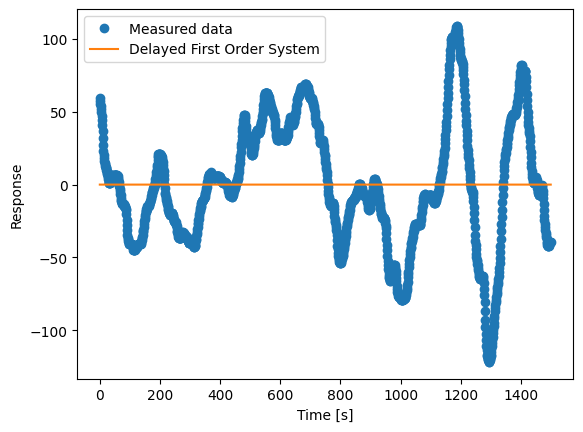

In [10]:
# Plot the results for one of the trials
plt.figure()
plt.plot(t, trials[0], 'o', label='Measured data')
plt.plot(t, delayed_first_order_system(t, K_est, T_est), '-', label='Delayed First Order System')
plt.xlabel('Time [s]')
plt.ylabel('Response')
plt.legend()
plt.show()